In [5]:
import pandas as pd, numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


/Users/williamleroy/PycharmProjects/PythonProject/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
# 1. Charge le CSV d'entraînement
df = pd.read_csv("../data/train_essays.csv")

# 2. Si tu n'as pas encore de colonne déjà pré-traitée :
from src.preprocess import clean_text
df["text_pp"] = df["text"].apply(clean_text)

# 3. Encode les textes avec Sentence-BERT (MiniLM)
model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")
embeddings = model.encode(
    df["text_pp"].tolist(),
    batch_size=128,
    show_progress_bar=True
)

print("Shape embeddings :", embeddings.shape)


Batches: 100%|██████████| 11/11 [00:12<00:00,  1.13s/it]

Shape embeddings : (1378, 384)


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Split 80 / 20 stratifié
X_tr, X_val, y_tr, y_val = train_test_split(
    embeddings, df["generated"],
    test_size=0.20, random_state=42, stratify=df["generated"]
)

# Classifieur linéaire
clf = LogisticRegression(max_iter=10_000, n_jobs=-1)
clf.fit(X_tr, y_tr)

y_pred = clf.predict(X_val)
print(classification_report(y_val, y_pred, digits=3))


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

              precision    recall  f1-score   support

           0      0.996     1.000     0.998       275
           1      0.000     0.000     0.000         1

    accuracy                          0.996       276
   macro avg      0.498     0.500     0.499       276
weighted avg      0.993     0.996     0.995       276



/Users/williamleroy/PycharmProjects/PythonProject/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/williamleroy/PycharmProjects/PythonProject/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/williamleroy/PycharmProjects/PythonProject/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

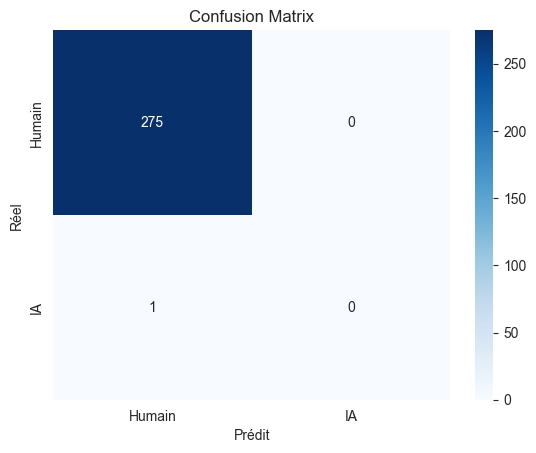

In [8]:
import seaborn as sns, matplotlib.pyplot as plt

cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Humain", "IA"],
            yticklabels=["Humain", "IA"])
plt.xlabel("Prédit"); plt.ylabel("Réel"); plt.title("Confusion Matrix")
plt.show()


In [9]:
# Distribution globale
print("Comptage complet dans le dataset :")
display(df["generated"].value_counts())

# Distribution dans l'entrainement / validation
print("\nSplit 80/20 :")
print("Train :", np.bincount(y_tr))
print("Val   :", np.bincount(y_val))


Comptage complet dans le dataset :


generated
0    1375
1       3
Name: count, dtype: int64


Split 80/20 :
Train : [1100    2]
Val   : [275   1]


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

              precision    recall  f1-score   support

           0      0.996     1.000     0.998       275
           1      0.000     0.000     0.000         1

    accuracy                          0.996       276
   macro avg      0.498     0.500     0.499       276
weighted avg      0.993     0.996     0.995       276



/Users/williamleroy/PycharmProjects/PythonProject/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/williamleroy/PycharmProjects/PythonProject/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/williamleroy/PycharmProjects/PythonProject/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

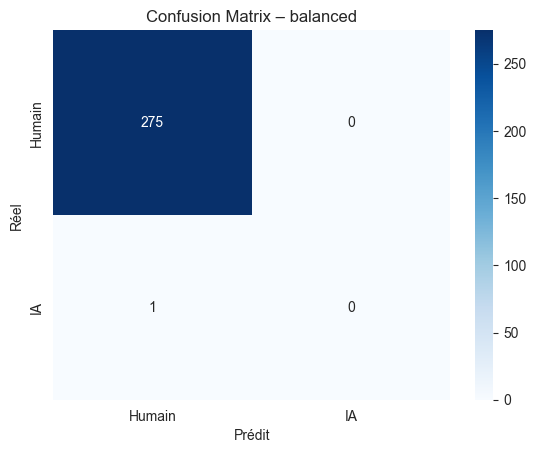

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns, matplotlib.pyplot as plt

# Logistic Regression pondérée
clf_bal = LogisticRegression(
    max_iter=10_000,
    n_jobs=-1,
    class_weight="balanced"   # clé magique
)
clf_bal.fit(X_tr, y_tr)

y_pred_bal = clf_bal.predict(X_val)
print(classification_report(y_val, y_pred_bal, digits=3))

# Heatmap confusion
cm = confusion_matrix(y_val, y_pred_bal)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Humain", "IA"],
            yticklabels=["Humain", "IA"])
plt.xlabel("Prédit"); plt.ylabel("Réel"); plt.title("Confusion Matrix – balanced"); plt.show()


In [11]:
# 1. Oversampling de la classe minoritaire
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)

X_balanced, y_balanced = ros.fit_resample(embeddings, df["generated"])
print("Après oversampling :", np.bincount(y_balanced))  # doit être 50/50

# 2. Nouveau split 80/20 stratifié sur le jeu ÉQUILIBRÉ
X_tr, X_val, y_tr, y_val = train_test_split(
    X_balanced, y_balanced,
    test_size=0.20, random_state=42, stratify=y_balanced
)


Après oversampling : [1375 1375]


/Users/williamleroy/PycharmProjects/PythonProject/.venv/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/williamleroy/PycharmProjects/PythonProject/.venv/lib/python3.9/site-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/Users/williamleroy/PycharmProjects/PythonProject/.venv/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


              precision    recall  f1-score   support

           0      1.000     1.000     1.000       275
           1      1.000     1.000     1.000       275

    accuracy                          1.000       550
   macro avg      1.000     1.000     1.000       550
weighted avg      1.000     1.000     1.000       550



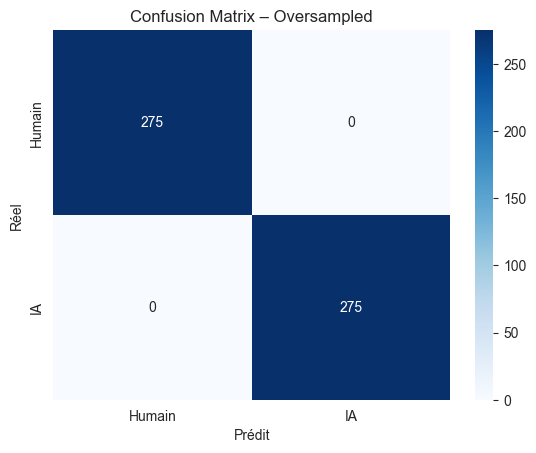

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns, matplotlib.pyplot as plt

clf = LogisticRegression(max_iter=10_000, n_jobs=-1)
clf.fit(X_tr, y_tr)

y_pred = clf.predict(X_val)
print(classification_report(y_val, y_pred, digits=3))

cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Humain", "IA"],
            yticklabels=["Humain", "IA"])
plt.xlabel("Prédit"); plt.ylabel("Réel"); plt.title("Confusion Matrix – Oversampled"); plt.show()


In [13]:
# 1. Split d'abord le dataset original très déséquilibré
X_tr, X_val, y_tr, y_val = train_test_split(
    embeddings, df["generated"],
    test_size=0.20, random_state=42, stratify=df["generated"]
)

# 2. Oversampling SEULEMENT sur le train
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_tr_bal, y_tr_bal = ros.fit_resample(X_tr, y_tr)

print("Équilibrage train :", np.bincount(y_tr_bal))
print("Validation reste déséquilibrée :", np.bincount(y_val))


Équilibrage train : [1100 1100]
Validation reste déséquilibrée : [275   1]


/Users/williamleroy/PycharmProjects/PythonProject/.venv/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/williamleroy/PycharmProjects/PythonProject/.venv/lib/python3.9/site-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/Users/williamleroy/PycharmProjects/PythonProject/.venv/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

              precision    recall  f1-score   support

           0      0.996     1.000     0.998       275
           1      0.000     0.000     0.000         1

    accuracy                          0.996       276
   macro avg      0.498     0.500     0.499       276
weighted avg      0.993     0.996     0.995       276



/Users/williamleroy/PycharmProjects/PythonProject/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/williamleroy/PycharmProjects/PythonProject/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/williamleroy/PycharmProjects/PythonProject/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

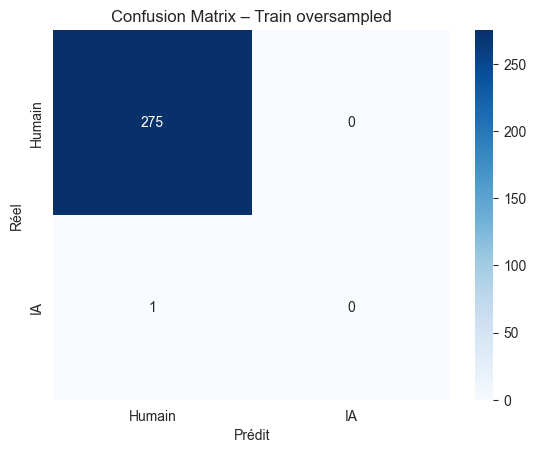

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns, matplotlib.pyplot as plt

clf = LogisticRegression(max_iter=10_000, n_jobs=-1)
clf.fit(X_tr_bal, y_tr_bal)

y_pred = clf.predict(X_val)
print(classification_report(y_val, y_pred, digits=3))

cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Humain", "IA"],
            yticklabels=["Humain", "IA"])
plt.xlabel("Prédit"); plt.ylabel("Réel"); plt.title("Confusion Matrix – Train oversampled"); plt.show()


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

              precision    recall  f1-score   support

           0      0.996     1.000     0.998       275
           1      0.000     0.000     0.000         1

    accuracy                          0.996       276
   macro avg      0.498     0.500     0.499       276
weighted avg      0.993     0.996     0.995       276



/Users/williamleroy/PycharmProjects/PythonProject/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/williamleroy/PycharmProjects/PythonProject/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/williamleroy/PycharmProjects/PythonProject/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

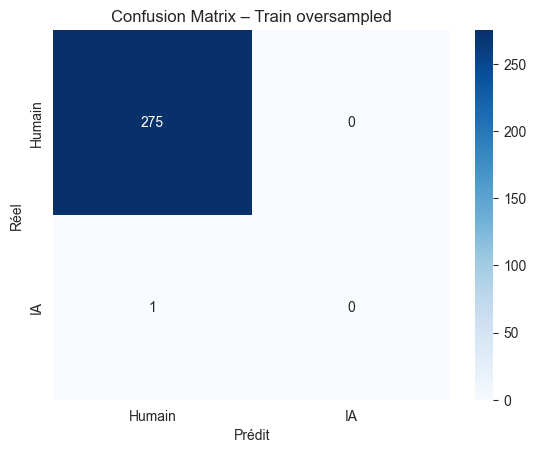

In [15]:
# ==== Entraînement sur le TRAIN équilibré, évaluation sur la VAL déséquilibrée ====
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns, matplotlib.pyplot as plt

clf = LogisticRegression(max_iter=10_000, n_jobs=-1)   # modèle simple linéaire
clf.fit(X_tr_bal, y_tr_bal)                            # entraînement sur données oversamplées

y_pred = clf.predict(X_val)                            # prédictions sur validation d'origine
print(classification_report(y_val, y_pred, digits=3))  # rapport texte

cm = confusion_matrix(y_val, y_pred)                   # heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Humain", "IA"],
            yticklabels=["Humain", "IA"])
plt.xlabel("Prédit"); plt.ylabel("Réel")
plt.title("Confusion Matrix – Train oversampled"); plt.show()
